# Visualize output results by first computing 64k vertex data and averaging to parcels -- task activation X FC change gradient
# Response to review

## Takuya Ito
#### 05/14/2020

In [2]:
import numpy as np
from utils.bootstrap_corr import *
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.sandbox.stats.multicomp as mc
import seaborn as sns
plt.style.use("ggplot")
sns.set_style('whitegrid')
plt.rcParams["font.family"] = "Arial"
import nibabel as nib
import pandas as pd
import h5py
from importlib import reload
import os
from brainsmash.mapgen.base import Base
from brainsmash.mapgen.stats import pearsonr, pairwise_r

## Set-up parameters

In [3]:
## General parameters/variables 
nParcels = 360

glasserfile2 = '../resultdata/Q1-Q6_RelatedParcellation210.LR.CorticalAreas_dil_Colors.32k_fs_RL.dlabel.nii'
glasser2 = nib.load(glasserfile2).get_data()
glasser2 = np.squeeze(glasser2)

color1, color2 = sns.color_palette(palette='pastel',n_colors=2)

# Import network partition
networkdef = np.loadtxt('../resultdata/network_partition.txt')
# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()
 
associationnets = ['con','dan','lan','fpn','dmn','pmulti','none1','none2']
sensorimotornets = ['vis1','vis2','smn','aud']

roi_id = np.zeros((nParcels,))
tmp = {}
netcount = 0
for network in networkmappings:
    net = np.where(networkdef==networkmappings[network])[0]
    for roi in net:
        if network in associationnets:
            tmp[roi] = color1 #'r'
            roi_id[roi] = -1
        else:
            tmp[roi] = color2 #'b'
            roi_id[roi] = 1
    netcount += 1
    
roiColorsByNetwork = []
for roi in range(len(networkdef)):
    roiColorsByNetwork.append(tmp[roi])

/Users/tito/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


# Load in result data


#### Load in task activity and connectivity data

In [4]:
resultdir = '../resultdata/'
#
activity = np.loadtxt(resultdir + '/activity/64k2Parcel_activity_canonicalHRF.csv',delimiter=',')
t_act = np.mean(activity,axis=1)
subj_activity = np.loadtxt(resultdir + '/activity/64k2Parcel_activity_canonicalHRF_allSubjs.csv',delimiter=',')
#
orig_activity = np.loadtxt(resultdir + '/activity/activity_canonicalHRF.csv',delimiter=',')
orig_t_act = np.mean(orig_activity,axis=1)

connectivity = np.loadtxt(resultdir + '/connectivity/conn_taskVrest_gbc_FIR.csv', delimiter=',')

nsubjs = subj_activity.shape[1]

#### Load in replication data

In [5]:
#
activity_rep = np.loadtxt(resultdir + '/activity/64k2Parcel_activity_canonicalHRF_replication.csv',delimiter=',')
t_act_rep = np.mean(activity_rep,axis=1)
subj_activity_rep = np.loadtxt(resultdir + '/activity/64k2Parcel_activity_canonicalHRF_allSubjs_replication.csv',delimiter=',')
#
orig_activity_rep = np.loadtxt(resultdir + '/activity/activity_canonicalHRF_replication.csv',delimiter=',')
orig_t_act_rep= np.mean(orig_activity_rep,axis=1)
#
connectivity_rep = np.loadtxt(resultdir + '/connectivity/conn_taskVrest_gbc_replication_FIR.csv', delimiter=',')

nsubjs = subj_activity.shape[1]

# Activity X Connectivity data

## Run correlation analysis (group-level and within-subject) comparing activity x connectivity decodability

#### Group-level correlation

Spearman True: -0.26355707477166745 | CI = ( -0.3601065675410888 , -0.1646780369525288 )
Pearson True: -0.238346771886868 | CI = ( -0.32211301810432813 , -0.14650443744250286 )


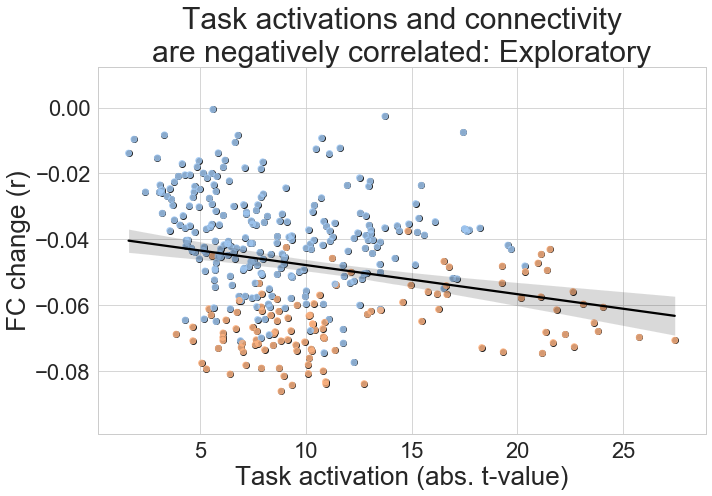

In [6]:
r, lower_ci, upper_ci = bootstrap_corr(t_act,np.mean(connectivity,axis=1),corr_type='spearman')
print('Spearman True:', r, '| CI = (', lower_ci, ',', upper_ci,')')
#
r, lower_ci, upper_ci = bootstrap_corr(t_act,np.mean(connectivity,axis=1),corr_type='pearson')
print('Pearson True:', r, '| CI = (', lower_ci, ',', upper_ci,')')

plt.figure(figsize=(10,7))
sns.regplot(t_act,np.mean(connectivity,axis=1),color='k',fit_reg=False)
sns.regplot(t_act,np.mean(connectivity,axis=1),color='k',scatter_kws={'color':roiColorsByNetwork})
plt.ylabel('FC change (r)',fontsize=26)
plt.xlabel('Task activation (abs. t-value)',fontsize=26)
plt.title('Task activations and connectivity\nare negatively correlated: Exploratory',fontsize=30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
# plt.savefig('SFig_64k2Parcel_ActivityXConnectivity_Exploratory.pdf')

Spearman True: -0.26567437505947833 | CI = ( -0.36595331830193556 , -0.15999545765945744 )
Pearson True: -0.2493073495611887 | CI = ( -0.3376628134423365 , -0.1555404829928746 )


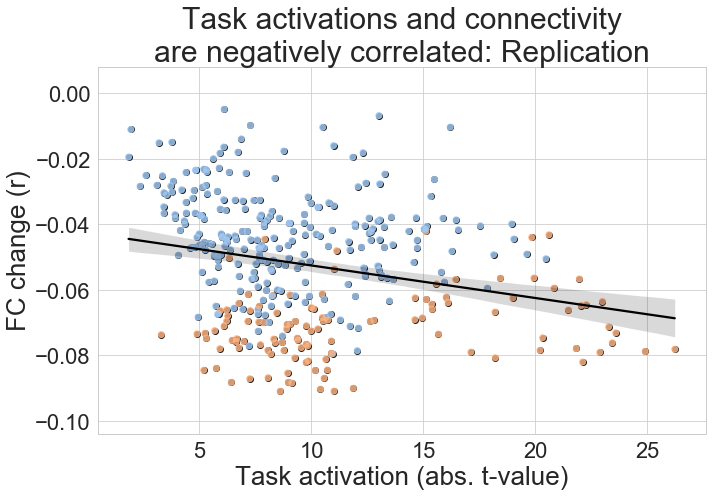

In [7]:
r, lower_ci, upper_ci = bootstrap_corr(t_act_rep,np.mean(connectivity_rep,axis=1),corr_type='spearman')
print('Spearman True:', r, '| CI = (', lower_ci, ',', upper_ci,')')
#
r, lower_ci, upper_ci = bootstrap_corr(t_act_rep,np.mean(connectivity_rep,axis=1),corr_type='pearson')
print('Pearson True:', r, '| CI = (', lower_ci, ',', upper_ci,')')

plt.figure(figsize=(10,7))
sns.regplot(t_act_rep,np.mean(connectivity_rep,axis=1),color='k',fit_reg=False)
sns.regplot(t_act_rep,np.mean(connectivity_rep,axis=1),color='k',scatter_kws={'color':roiColorsByNetwork})
plt.ylabel('FC change (r)',fontsize=26)
plt.xlabel('Task activation (abs. t-value)',fontsize=26)
plt.title('Task activations and connectivity\nare negatively correlated: Replication',fontsize=30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
# plt.savefig('SFig_64k2Parcel_ActivityXConnectivity_Replication.pdf')

# Correlate parcellated activity with vertex-then-average activity

Vertex-wise activations (then downsample) X Task activations
Spearman True: 0.9999992283891079 | Lower bound: 0.9999920264444256 | Upper bound: 1.0
Pearson True: 0.9999999874236084 | Lower bound: 0.9999999836753101 | Upper bound: 0.9999999904828973


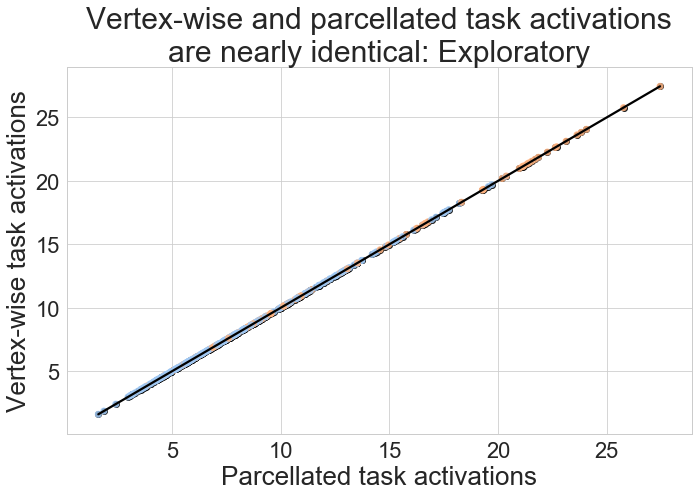

In [8]:
print('Vertex-wise activations (then downsample) X Task activations')
r, lower_ci, upper_ci = bootstrap_corr(t_act,orig_t_act,corr_type='spearman')
print('Spearman True:', r, '| Lower bound:', lower_ci, '| Upper bound:', upper_ci)
#
r, lower_ci, upper_ci = bootstrap_corr(t_act,orig_t_act,corr_type='pearson')
print('Pearson True:', r, '| Lower bound:', lower_ci, '| Upper bound:', upper_ci)

plt.figure(figsize=(10,7))
sns.regplot(orig_t_act,t_act,color='k',fit_reg=False)
sns.regplot(orig_t_act,t_act,color='k',scatter_kws={'color':roiColorsByNetwork})
plt.ylabel('Vertex-wise task activations',fontsize=26)
plt.xlabel('Parcellated task activations',fontsize=26)
plt.title('Vertex-wise and parcellated task activations\nare nearly identical: Exploratory',fontsize=30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
# plt.savefig('SFig_64k2Parcel_64kVertexWiseXActivity_Exploratory.pdf')

Vertex-wise activations (then downsample) X Task activations
Spearman True: 0.9999984567782159 | Lower bound: 0.9999891970265588 | Upper bound: 1.0
Pearson True: 0.9999999849115259 | Lower bound: 0.9999999809176296 | Upper bound: 0.999999988179775


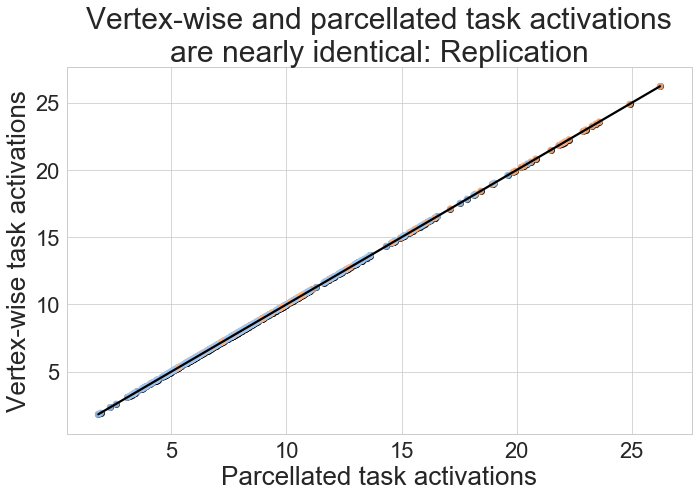

In [9]:
print('Vertex-wise activations (then downsample) X Task activations')
r, lower_ci, upper_ci = bootstrap_corr(t_act_rep,orig_t_act_rep,corr_type='spearman')
print('Spearman True:', r, '| Lower bound:', lower_ci, '| Upper bound:', upper_ci)
#
r, lower_ci, upper_ci = bootstrap_corr(t_act_rep,orig_t_act_rep,corr_type='pearson')
print('Pearson True:', r, '| Lower bound:', lower_ci, '| Upper bound:', upper_ci)

plt.figure(figsize=(10,7))
sns.regplot(orig_t_act_rep,t_act_rep,color='k',fit_reg=False)
sns.regplot(orig_t_act_rep,t_act_rep,color='k',scatter_kws={'color':roiColorsByNetwork})
plt.ylabel('Vertex-wise task activations',fontsize=26)
plt.xlabel('Parcellated task activations',fontsize=26)
plt.title('Vertex-wise and parcellated task activations\nare nearly identical: Replication',fontsize=30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
# plt.savefig('SFig_64k2Parcel_64kVertexWiseXActivity_Replication.pdf')

# Create surface maps

#### Map task activation and connectivity changes to surface 

In [29]:
# roidata = np.zeros((glasser2.shape[0],2)) 

# tmp_act = t_act
# tmp_act_rep = t_act_rep

# print('Act: Min =', np.min(t_act), '| Max =', np.max(t_act))

# for roi in range(nParcels):
#     roi_ind = np.where(glasser2==roi+1)[0]
    
#     roidata[roi_ind,0] = tmp_act[roi]
#     roidata[roi_ind,1] = tmp_act_rep[roi]
    
# # Compute effect size baseline (information content)
# filename = '64k2ParcelActivity'
# np.savetxt(filename + '.csv', roidata,fmt='%s')
# wb_command = 'wb_command -cifti-convert -from-text ' + outdir + filename + '.csv ' + glasserfile2 + ' ' + outdir + filename + '.dscalar.nii -reset-scalars'
# os.system(wb_command)



Act: Min = 1.615758967557375 | Max = 27.437330590488084


0